# F21NL 2025-26: Introduction to PyTorch

Content of this tutorial is delivered during the 'F20NL/F21NL - Introduction to Natural Language Processing' course at Heriot-Watt University.

### What is PyTorch?
PyTorch is an optimized tensor library for deep learning using GPUs and CPUs. This is the key library that we will use to implement all the Machine Learning components that we will be studying during F21NL.

### How do I install it?

Go to the official documentation on the PyTorch website and select the version you prefer depending on your operating system: https://pytorch.org/get-started/locally/

Always refer to the official documentation to better understand how certain methods work: https://pytorch.org/docs/stable/index.html

On Google Colab, we can directly use PyTorch because it's already installed. Let's see how we can use it.


In [ ]:
!pip install torch numpy matplotlib -U

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Part 0: Tensor manipulations

### Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model's parameters.

Tensors are similar to NumPy's ndarrays, except that tensors can run on GPUs or other specialized hardware to accelerate computing. If you're familiar with ndarrays, you'll be right at home with the Tensor API. If not, follow along in this quick API walkthrough.

In [ ]:
# Directly from data

# Tensors can be created directly from data. The data type is automatically inferred.

data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)

display(x_data)

In [ ]:
# We can create a tensor from a NumPy array

np_array = np.array(data)
x_np = torch.from_numpy(np_array)

In [ ]:
shape = (2, 3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

### Tensor attributes

Given an initialised tensor, we can derive important attributes that will be useful during the design and training of our models.

In [ ]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

### Tensor operations

We can manipulate tensors in PyTorch in a similar fashion to NumPy. For example, we can perform sums, products, slicing and indexing.

In [ ]:
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(tensor)

In [ ]:
# we can concatenate tensors

t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

In [ ]:
# we can multiply tensors

# This computes the element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

In [ ]:
# this computes the matrix multiplication

print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

In [ ]:
# if you want to go back to NumPy

t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

In [ ]:
# or from NumPy to torch

n = np.ones(5)
t = torch.from_numpy(n)

In [ ]:
# Changes to the numpy array are reflected in the underlying tensor


np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

In [ ]:
# Reshape a tensor

# Has a shape of (2, 3, 4)
random_tensor = torch.randn((2, 3, 4))
print(random_tensor.shape)

# Reshape it to (2*3, 4), we can use -1 for any dimension which will indicate that the reshaping will be conducted in a way to match the dimensions
print(random_tensor.reshape(2 * 3, -1).shape)

# Add an additional dimension
print(random_tensor.reshape(1, 2, 3, 4).shape)

# or use .unsqueeze(0)
print(random_tensor.reshape(1, 2, 3, 4).shape)

# Similarly we can squeeze a tensor along a given dimension, we use -1 here to indicate the last dimension
random_tensor = torch.randn(2, 3, 4).unsqueeze(-1)
print(random_tensor.shape)

print(random_tensor.squeeze(-1).shape)

### Exercise 1: Row-wise Broadcasting
Add `[1, 2, 3]` to the rows of the 2D tensor `[[10, 10, 10],  [20, 20, 20],  [30, 30, 30]]`


In [ ]:
tensor_2d = torch.tensor([[10, 10, 10], [20, 20, 20], [30, 30, 30]])

tensor_1d = torch.tensor([1, 2, 3])

def add_to_different_row_slow(tensor_2d: torch.Tensor, tensor_1d: torch.Tensor) -> torch.Tensor:
    """Add a 1D array to each row of a 2D array using a for loop."""
    result = torch.zeros_like(tensor_2d)
    for i in range(tensor_2d.shape[0]):
        result[i, :] = tensor_2d[i, :] + tensor_1d[i]
    return result

def add_to_different_row_fast(tensor_2d: torch.Tensor, tensor_1d: torch.Tensor) -> torch.Tensor:
    """Add a 1D array to each row of a 2D array using broadcasting."""
    raise NotImplementedError("You need to implement `add_to_different_row_fast`")

result_slow = add_to_different_row_slow(tensor_2d, tensor_1d)
result_fast = add_to_different_row_fast(tensor_2d, tensor_1d)

if not torch.allclose(result_slow, result_fast):
    raise AssertionError("The output from the slow function and the fast function are not identical.")

### Exercise 2: 3D Broadcasting

You have a 3D tensor of shape (2, 3, 4) and want to subtract the mean of each 2D slice (along the last two axes) from each slice.

In [ ]:
torch.manual_seed(0)
tensor_3d = torch.randint(1, 10, size=(2, 3, 4), dtype=torch.float)

def subtract_mean_slow(tensor_3d: torch.Tensor) -> torch.Tensor:
    """Subtract the mean of each 2D slice from each slice using a for loop."""
    result = torch.zeros_like(tensor_3d, dtype=torch.float)
    for i in range(tensor_3d.shape[0]):
        mean_slice = torch.mean(tensor_3d[i, :, :])
        result[i, :, :] = tensor_3d[i, :, :] - mean_slice
    return result


def subtract_mean_fast(tensor_3d: torch.Tensor) -> torch.Tensor:
    """Subtract the mean of each 2D slice from each slice using broadcasting."""
    raise NotImplementedError("You need to implement `subtract_mean_fast`")


result_slow = subtract_mean_slow(tensor_3d)
result_fast = subtract_mean_fast(tensor_3d)

if not torch.allclose(result_slow, result_fast):
    raise AssertionError("The output from the slow function and the fast function are not identical.")

## Part 1: A simple bi-gram model for generating names

In [ ]:
!wget https://raw.githubusercontent.com/karpathy/makemore/refs/heads/master/names.txt -O names.txt

In [ ]:
words = open('names.txt', 'r').read().splitlines()

Lets visualize some examples

In [ ]:
words[:10]

In [ ]:
len(words)

In [ ]:
min(len(w) for w in words)

In [ ]:
max(len(w) for w in words)

- Character level language model
- Each name corresponds to an example, and we treat each example as a sequence of characters.

- So the example `emma` corresponds to the sequence `e-m-m-a`, and the character-level language model will learn how to model these sequences by predicting the next character in the sequence.

### Finding bi-grams in the dataset

Let's start by identifying bi-grams in the dataset. A character-level bi-gram is a sequence of two consecutive characters.

So for the example `emma` we will have the bi-grams: `[em, mm, ma]`

In the `emma` example above, we see that the character `e` is is coming first while `a` is coming last but we do not know exactly, when to start sampling a character or end the sequence.

**For this reason it is common to include some special characters that delineate the start and the end of a sequence**. In NLP it is common to mark them to enclose these characters with brackets. In our case, we will use `<S>` and `<E>` as the special tokens to mark the begining and the end of a sequence

In [ ]:
def find_bigrams_in_words(words: list[str]) -> dict[tuple[str, str], int]:
    """Find the bigrams in a list of words."""
    b = {}
    for w in words:
        chs = ['<S>'] + list(w) + ['<E>']
        for ch1, ch2 in zip(chs, chs[1:]):
            bigram = (ch1, ch2)
            b[bigram] = b.get(bigram, 0) + 1

    return b

In [ ]:
# Lets see now the bigrams for the word `emma`
find_bigrams_in_words(words=["emma"])

This is actually a powerful tool that we can use later on as it describes the co-occurences of individual characters. In other words, we can see that bi-grams with a high number of counts are frequently occuring in common names, while bi-grams with low frequencies are rarely appearing.

Let's run it for the whole dataset.

In [ ]:
# Run it for the whole dataset
bigrams = find_bigrams_in_words(words=words)
sorted(bigrams.items(), key = lambda kv: -kv[1])

Building our character vocabulary

In [ ]:
def prepare_vocabulary(
    words: list[str], start_character: str = "<S>", end_character: str = "<E>"
) -> tuple[dict[str, int], dict[int, str]]:
    """Prepare the vocabulary from the list of names.

    Params:
        words (list[str]): A list of strings corresponding to names of our dataset
        start_character (str): The special starting character for a name
        end_character (str): The special ending character for a name

    Returns:
        chara2idx (dict[str, int]): A dictionary that maps characters to indices in the vocabulary
        idx2chara (dict[int, str]): A dictionary that maps indices to characters in the vocabulary
    """
    chars = sorted(list(set(''.join(words))))
    chara2idx = {s:i+1 for i,s in enumerate(chars)}

    # For convience, assign the start_character as the 1st character in the vocabulary
    chara2idx[start_character] = 0

    if end_character not in chara2idx:
        # For convenience, assign the end_character as the last character in the vocabulary
        chara2idx[end_character] = len(chars) + 1

    # Also create the inverse mapping for later use, i.e from integers to characters
    idx2chara = {i:s for s,i in chara2idx.items()}
    print(chara2idx)
    return chara2idx, idx2chara

chara2idx, idx2chara = prepare_vocabulary(words=words, start_character="<S>", end_character="<E>")

### Exercise 3: Bi-grams as a 2D tensor

Convert the dictionary of bi-grams into a 2D tensor, $N$, where $N[i, j]$ corresponds to the counts of the bigram character$_i$, character$_j$

In [ ]:
def find_bigrams_in_words_tensor(
    words: list[str], chara2idx: dict[str, int], start_character: str = "<S>", end_character: str = "<E>"
) -> torch.Tensor:
    """Find the bigrams in a list of words and return the counts as a 2D tensor.

    Params:
        words (list[str]): A list of strings corresponding to names of our dataset
        chara2idx (dict[str, int]): A dictionary that maps characters to indices in the vocabulary

    Returns:
        N (torch.Tensor): a 2D tensor that contains the counts for all bigrams
    """
    raise NotImplementedError("You need to implement `find_bigrams_in_words_tensor`")

In [ ]:
chara2idx, idx2chara = prepare_vocabulary(words=words, start_character="<S>", end_character="<E>")
N = find_bigrams_in_words_tensor(words=words, chara2idx=chara2idx).to(dtype=torch.int32)

first_row = torch.tensor([0, 4410, 1306, 1542, 1690, 1531, 417, 669,  874,  591, 2422, 2963, 1572, 2538, 1146, 394, 515, 92, 1639, 2055, 1308, 78, 376, 307, 134, 535, 929, 0], dtype=torch.int32)
if not torch.allclose(first_row, N[0]):
    raise AssertionError(f"Expecting the first for of N to be {first_row}, got {N[0]}")

fifth_row = torch.tensor([0, 1303, 1, 3,  149, 1283, 5,   25,  118,  674, 9, 3, 60, 30, 31, 378, 0, 1, 424, 29, 4, 92, 17, 23, 0, 317, 1, 516], dtype=torch.int32)
if not torch.allclose(fifth_row, N[4]):
    raise AssertionError(f"Expecting the first for of N to be {fifth_row}, got {N[0]}")

Lets visualize the output 2D tensor

In [ ]:
def visualize_tensor(bigram_tensor: torch.Tensor, idx2chara: dict[int, str]) -> None:
    """Plot the bigram 2D tensor as a table"""
    plt.figure(figsize=(16,16))
    plt.imshow(bigram_tensor, cmap='Blues')
    for i in range(len(idx2chara)):
        for j in range(len(idx2chara)):
            chstr = idx2chara[i] + idx2chara[j]
            plt.text(j, i, chstr, ha="center", va="bottom", color='gray', fontsize=7)
            plt.text(j, i, bigram_tensor[i, j].item(), ha="center", va="top", color='gray')
    plt.axis('off');


visualize_tensor(bigram_tensor=N, idx2chara=idx2chara)

Lets have a deeper look at what we have made here. This 2D tensor shows the counts of all bi-grams in our dataset. If you have implemented the above exercise correctly, you will notice that for example the bigram `a<E>` appears quite often, possibly because many names end with `a` (like emma!). But other bigrams are never appearing for example `xq`.


**Question** Additionally, we also observe that the first column and the last row of the matrix are completely zeros. Why?

<details>
<summary><strong>Answer</strong></summary>

The `<S>` is used to describe the start of a name, and as a result we will never have an example that does not begin with this special character, and so all bi-grams like `a<S>` are not feasible within our dataset.
Similarly the `<E>` is used to describe the end of a name, and likewise the bi-gram `<E>a` is also not feasible.




Due to this redundancy (click the answer if you haven't), we will use the same character to depict the start and the end of a name:

In [ ]:
chara2idx, idx2chara = prepare_vocabulary(words=words, start_character=".", end_character=".")
N = find_bigrams_in_words_tensor(words=words, chara2idx=chara2idx, start_character=".", end_character=".")
visualize_tensor(bigram_tensor=N, idx2chara=idx2chara)

### Generating names from our statistics model

As explained this 2D tensor holds the counts for all bi-grams in our dataset. All we have to do now, is follow these counts to start sampling names from that model.

To start sampling, we only need to look at the first row of our table. These counts show us how likely it is to start a name corresponding to the character $character_i$ where $i$ is the position of an element in the first row:

In [ ]:
N[0]

#### Sampling from the probability distribution

To sample from the distribution we will use [torch.multinomial](https://docs.pytorch.org/docs/stable/generated/torch.multinomial.html). We also use a generator ([torch.Generator](https://docs.pytorch.org/docs/stable/generated/torch.Generator.html)) with a fixed random seed so that the sampling is deterministic

In [ ]:
g = torch.Generator().manual_seed(2147483647)
p = torch.rand(3, generator=g)
p = p / p.sum()
p

In [ ]:
torch.multinomial(p, num_samples=100, replacement=True, generator=g)

Looking at our probability distribution $p$ (this is randomly created in this example), we see that approximately the first character has approximately 60% probability, the second 30% and the last approximately 9%. So when we draw 100 samples from that probability distribution we expect approximately 60% of the samples to correspond to the first character and so on.


In our character, level example, we can create a probability vector by normalizing each element by the sum of all counts.

Note that we convert the vector to float to perform floating point division

In [ ]:
p = N[0].float()
p = p / p.sum()
print(p)

g = torch.Generator().manual_seed(2147483647)
idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
print(idx2chara[idx])

To continue sampling in order to create our name, we only need to follow the probabilities for the next character based on character that we already drawn. This is just the row N[idx]! We continue the same logic, until we sample the index that corresponds to the end of the sequence.

### Exercise 4: Sampling names from a bi-gram

Write a function that samples names from the bigram table that we have created:

In [ ]:
def sample_name(
    bigram_tensor: torch.Tensor,
    generator: torch.Generator,
    idx2chara: dict[int, str],
    end_chara_index: int = 0,
) -> str:
    """Sample a name from the bigram model

    Args:
        bigram_tensor (torch.Tensor): A 2D dimensional tensor containing the counts of each succeeding character
        generator (torch.Generator): A generator used when sampling to ensure deterministic behavior
        idx2chara (dict[int, str]): A dictionary that maps indices to characters in the vocabulary
        end_chara_index (int): The index of the end-of-sequence character

    Returns:
        str: A sampled name
    """
    raise NotImplementedError("You need to implement `sample_name`")

In [ ]:
generator = torch.Generator().manual_seed(2147483647)

names = [
    sample_name(bigram_tensor=N, generator=generator, idx2chara=idx2chara, end_chara_index=0)
    for _ in range(2)
]

if names != ["cexzm", "zoglkurkicqzktyhwmvmzimjttainrlkfukzkktda"]:
    raise AssertionError("The `sample_name` is incorrect")

In [ ]:
generator = torch.Generator().manual_seed(2147483647)
for idx in range(10):
    print(sample_name(bigram_tensor=N, generator=generator, idx2chara=idx2chara, end_chara_index=0))

**Why is this so terrible?**

The short answer is that bi-gram character-level modeling is actually really bad. When generating the name `ka` the model does not know that the `a` is the very first `a` it has generated. All it knows is that we drawn a `k` previously and because `a` is actually a very likely last name character, it predicts the end-of-sequence token `.`


To convience yourself that this is less terrible than it actually is, try to set the probability of the next character to a uniform distribution (e.g use ```next_next_chara_probabilities = torch.ones(len(idx2chara)) / len(idx2chara)``` instead of the probabilities from the 2D tensor)

The names that you generate should look like this (which are clearly worse than what we are generating using probabilities obtained from our dataset):


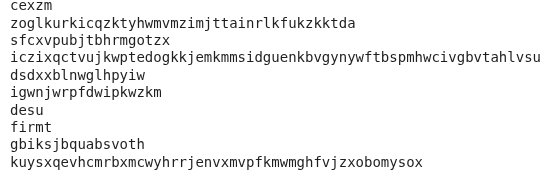

### Part 2: Quality of a Model as a Loss Function
So far we have used only statistics to essentially build a 2D tensor and sample probabilities. In this part we want to assess how "good" of a model we have using a single number.


Before we do that, we will do one small optimization with broadcasting. Unless you are smarter than the person who wrote this, your (and the above) solution for sampling next characters actually performs alot of redundant operations by re-computing the probabilities again and again in each iteration. We are going to change this and compute the probabilities for every character $j$ given the character $i$ as $P[i, j]$:

In [ ]:
P = N.float()
P /= P.sum(1, keepdims=True)

In [ ]:
def sample_name_from_probabilities(
    probabilities: torch.Tensor,
    generator: torch.Generator,
    idx2chara: dict[int, str],
    end_chara_index: int = 0,
) -> str:
    """Same functionality as `sample_name` but a bit more compact.

    Args:
        probabilities (torch.Tensor): A 2D dimensional tensor containing the probabilities of each succeeding character
        generator (torch.Generator): A generator used when sampling to ensure deterministic behavior
        idx2chara (dict[int, str]): A dictionary that maps indices to characters in the vocabulary
        end_chara_index (int): The index of the end-of-sequence character

    Returns:
        str: A sampled name
    """
    characters = []
    current_idx = 0
    while True:
        next_chara_probabilities = probabilities[current_idx]
        next_chara_index = torch.multinomial(
            next_chara_probabilities,
            num_samples=1,
            replacement=True,
            generator=generator,
        ).item()

        if next_chara_index == end_chara_index:
            break

        current_idx = next_chara_index
        characters.append(idx2chara[next_chara_index])

    return "".join(characters)

In [ ]:
# These should be identical to the previous execution
generator = torch.Generator().manual_seed(2147483647)
for idx in range(10):
    print(sample_name_from_probabilities(probabilities=P, generator=generator, idx2chara=idx2chara, end_chara_index=0))

The next step is to provide a `quality` of this model, how good is it at predicting the next character of a name (it is not). Just like we saw in the lectures, the quality of a model is measured as a loss function, i.e a single number that measures how "good" a model is based on some data. In this example we will use the training data and compute the training loss

In [ ]:
chs = ["."] + list(words[0]) + ["."]
for ch1, ch2 in zip(chs, chs[1:]):
    ch1_idx = chara2idx[ch1]
    ch2_idx = chara2idx[ch2]
    prob = P[ch1_idx, ch2_idx]
    print(f"{ch1}{ch2}: {prob:4f}")

So these are the probabilities that the model assigns to each bi-gram. Some of them are very low like 4%, 3% but some of them are very high like 38% and 19%.

**Are these probabilities good or bad?** For a total 27 equally likely characters the probability of a single character would be $1/27 \approx 0.037$ or 3.7%. So anything above this threshold means that the model has actually learned something from the training data. If we had a very good model we would expect that all of these probabilities will be near 1.

**How can we summarize the probabilities into a single number that represents how good is our model?**
The common practice is to use the likelihood, which corresponds to the product of these probabilities. So if we have a very good model we would expect that the product of these probabilities will be very high. However, because the probabilities are < 1, the product of them will be a low number. So for convience in terms of math, we do not work with the likelihood, but the log-likelihood:

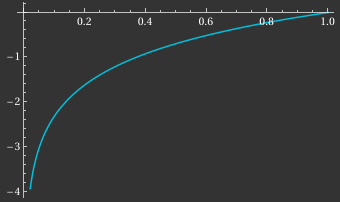

And so if we pass 1 to the log-likelihood we get 1, but the smaller the likelihood the more negative the log-likehood becomes

In [ ]:
def compute_log_likelihood(word: str, chara2idx: dict[str, int], start_character: str = ".", end_character = ".") -> torch.Tensor:
    """Compute the log likelihood for a single word."""
    log_likelihood = 0
    chs = [start_character] + list(word) + [end_character]
    for ch1, ch2 in zip(chs, chs[1:]):
        ch1_idx = chara2idx[ch1]
        ch2_idx = chara2idx[ch2]
        prob = P[ch1_idx, ch2_idx]
        log_prob = torch.log(prob)
        print(f"{ch1}{ch2}: {prob:4f} {log_prob:4f}")
        log_likelihood += log_prob

    return log_likelihood

log_likelihood = compute_log_likelihood(word=words[0], chara2idx=chara2idx)
print(log_likelihood)

What we see here is that the smaller the probability, the more negative is the log-likelihood. However, what we would like as a loss function is exactly the opposite, so lower means better. We can do this using the negative log-likelihood as a measurement for our model:

In [ ]:
nll = -log_likelihood

The final thing to do is to average rather than a sum:

In [ ]:
def compute_negative_log_likelihood(word: str, chara2idx: dict[str, int], start_character: str = ".", end_character = ".") -> torch.Tensor:
    """Compute the negative log likelihood for a single word."""
    log_likelihood = 0
    counter = 0
    chs = [start_character] + list(word) + [end_character]
    for ch1, ch2 in zip(chs, chs[1:]):
        ch1_idx = chara2idx[ch1]
        ch2_idx = chara2idx[ch2]
        prob = P[ch1_idx, ch2_idx]
        log_prob = torch.log(prob)
        counter += 1
        log_likelihood += log_prob

    return -log_likelihood / counter

nll = print(compute_negative_log_likelihood(word=words[0], chara2idx=chara2idx))

#### Summarizing

We have developed a way of assessing how good is our model in terms of the likelihood, i.e the product of the probabilities of each generated character. So our goal is to find the parameters of the neural model that maximize this likelihood.

**This is equivalent to:**
- Maximizing the log-likelihood, because the log is a monotonic function
- Minimizing the negative log likelihood
- Minimizing the average negative log likelihood, because we just divide by a constant.

In [ ]:
# Lets estimate the negative log likelihood over the entire training set:
nll = torch.stack([compute_negative_log_likelihood(word=word, chara2idx=chara2idx) for word in words]).mean()
print(nll)

### Part 3: Developing our own Neural Bi-gram Language Model

In the final part we will develop our first neural model that will learn to predict the next character in the sequence of name.

- The model receives the current character, and with some parameters $W$, it computes the probability of the next character.

- We then are going to look at the probabilities distributions produced by our model, and compare them with the **labels** (the next character that follows). So knowing the correct character that should follow, we are going to use the probabilities to assess whether the model actually predicts the correct follow-up character.

- If a model confidently predicts the correct next character, the probability will be low, and as a result the loss function will be low. If a model has very high confidence but makes an incorrect prediction the loss will be very high.

- We are then going to use gradient based optimization to tune the parameters $W$ to minimize the loss

#### Compling our n-gram dataset

In [ ]:
def create_bigram_training_set(
    words: list[str], chara2idx: dict[str, int], start_character: str = ".", end_character = ".",
) -> tuple[torch.Tensor, torch.Tensor]:

    inputs, labels = [], []
    for word in words:
        chs = [start_character] + list(word) + [end_character]
        for ch1, ch2 in zip(chs, chs[1:]):
            ix1 = chara2idx[ch1]
            ix2 = chara2idx[ch2]
            inputs.append(ix1)
            labels.append(ix2)

    inputs = torch.tensor(inputs)
    labels = torch.tensor(labels)
    return inputs, labels

In [ ]:
# So now lets see what the inputs/labels for a single word would look like
inputs, labels = create_bigram_training_set(words=[words[0]], chara2idx=chara2idx)
print(f"Examples for word {words[0]}")
print(inputs)
print(labels)

Examples for word emma
tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In other words:
- Given the input 0 (which corresponds to the special token), we need to predict 5.
- Given the input 5, we need to predict 13, and so on

#### Converting integers to vectors for the neural model

Recall that during the lectures, the perceptron accepts a vector of inputs, multiplies it by some weights and makes a prediction:


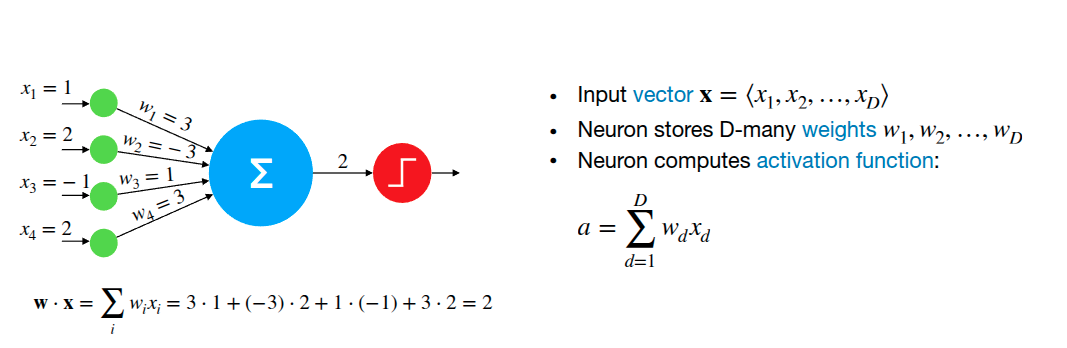

So we cant just plug-in integer values to our input, we need to think how to convert these integers into vectors

In [ ]:
import torch.nn.functional as F
xenc = F.one_hot(inputs, num_classes=len(chara2idx)).float()
xenc

In [ ]:
xenc.shape

In [ ]:
plt.imshow(xenc)

#### Constructing our first neuron

Lets construct our very first neuron, by randomly initializing a matrix $W$ oh shape `num_characters`, 1. This neuron will fire 1 activation per input, and since we have 5 inputs we can perform 5 activations at the same time by multiplying the input with the parameter $W$.


So we compute all activations of a set of examples in parallel, without the activation of each example affecting the other! This is a big deal when training models, as we can process an entire **batch** of examples and obtain the same results much quicker resulting in fast optimization and training


In [ ]:
W = torch.randn((len(chara2idx), 1))
# Matrix multplication between (5, 27) @ (27, 1) -> (5, 1)
print(xenc @ W)

# Notice how these two are identical
print((xenc @ W)[0])
print(xenc[0] @ W)

tensor([[ 0.6927],
        [-0.8701],
        [ 0.2291],
        [ 0.2291],
        [-1.0511]])
tensor([0.6927])
tensor([0.6927])


#### Taking it one step further from a neuron to a set of neurons that produce a probability distribution

In [ ]:
W = torch.randn(len(chara2idx), len(chara2idx))
print(xenc @ W)

For every 1 of the `num_characters` that we have created gives us the activation over the 5 input examples. See how the 13rd activation of the 3rd example is computed extremely efficiently:

In [ ]:
print((xenc @ W)[3, 13])
print("-----")
print(xenc[3])
print(W[:, 13])
print("-----")
# This should be identical as the first print statement
print((xenc[3] * W[:, 13]).sum())

**Interpreting these `num_charas` (27) numbers**:

What exactly are these numbers produced by our 27 neurons?
Ideally, we would like something like the 2D bi-gram tensor that we implemented previously so that we can easily compute the loss function.

So we want these numbers to represent some sort of probability.
But these numbers are floating point and can be negative and positive and they dont have the nice properties of a probability distribution. They also cannot be counts, because counts are strictly positive and also they are integers.

We are going to interpet these numbers as **log-counts**. To get the "counts" we are going to take the log-counts and exponentiate them. These "log-counts" are often referred to as **logits** and correspond to the un-normalized probabilities for our classes.

**HINT**: basically here we are implementing the `softmax` activation


In [ ]:
# log-counts
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
print(probs)
print("----")
print(probs[0])
print(probs[0].shape)
print("----")
print(probs[0].sum())

tensor([[0.0646, 0.0051, 0.0132, 0.0054, 0.0152, 0.0131, 0.0371, 0.0068, 0.0448,
         0.0431, 0.0194, 0.0091, 0.0085, 0.0359, 0.0074, 0.0304, 0.0958, 0.2574,
         0.0063, 0.1143, 0.0224, 0.0173, 0.0072, 0.0229, 0.0546, 0.0156, 0.0272],
        [0.0128, 0.0477, 0.0686, 0.0953, 0.0245, 0.0236, 0.0420, 0.0254, 0.0141,
         0.0949, 0.0462, 0.0836, 0.0299, 0.0212, 0.0077, 0.0573, 0.0177, 0.0339,
         0.0094, 0.0055, 0.0190, 0.0229, 0.0883, 0.0036, 0.0414, 0.0456, 0.0181],
        [0.0117, 0.1147, 0.0356, 0.0766, 0.0732, 0.0397, 0.0328, 0.0305, 0.0064,
         0.0018, 0.0074, 0.0186, 0.0634, 0.0409, 0.0138, 0.1350, 0.1286, 0.0118,
         0.0226, 0.0105, 0.0334, 0.0129, 0.0248, 0.0022, 0.0177, 0.0150, 0.0185],
        [0.0117, 0.1147, 0.0356, 0.0766, 0.0732, 0.0397, 0.0328, 0.0305, 0.0064,
         0.0018, 0.0074, 0.0186, 0.0634, 0.0409, 0.0138, 0.1350, 0.1286, 0.0118,
         0.0226, 0.0105, 0.0334, 0.0129, 0.0248, 0.0022, 0.0177, 0.0150, 0.0185],
        [0.0034, 0.0153,

**Success!**

For every one of the five examples above, we have created produced a row obtained from a neural net that can be interpreted as a probability distribution.

- We started by creating a vector from an integer via one-hot encoding
- We passed this vector into a single linear layer to obtain the representations of that vector
- We intepreted these representations as **logits** and we transformed them to a probability distribution
- We can use now the labels over each example to tune the parameter $W$ of that linear layer to maximize the probability of predicting the correct label for each example
- As we tune the weights $W$ we are going to get different probabilities and so the question becomes can we tune $W$ to get good probabilities? The way we are measuring "good" is by the loss function

#### Training a Neural Bi-gram Model

In [ ]:
inputs, labels = create_bigram_training_set(words=[words[0]], chara2idx=chara2idx)

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(chara2idx), len(chara2idx)), generator=g)

Forward pass: pass all input examples through the neural net

In [ ]:
# Step 1: Convert inputs to one-hot encoding
xenc = F.one_hot(inputs, num_classes=len(chara2idx)).float()
# Step 2: Predict log-counts
logits = xenc @ W
# Step 3: Convert logits to probabilities
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [ ]:
probs.shape

Computing the loss for the input examples:

In [ ]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  input = inputs[i].item() # input character index
  label = labels[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {idx2chara[input]}{idx2chara[label]} (indexes {input}, {label})')
  print('input to the neural net:', input)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', label)
  p = probs[i, label]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

In [ ]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((len(chara2idx), len(chara2idx)), generator=g, requires_grad=True)

In [ ]:
# forward pass
# input to the network: one-hot encoding
xenc = F.one_hot(inputs, num_classes=len(chara2idx)).float()
# predict log-counts
logits = xenc @ W
# Compute probabilities
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
# Compute the average negative log-likelihood
loss = -probs[torch.arange(labels.shape[0]), labels].log().mean()
print(loss.item())

 Backward pass: Propagate the loss to all parameters of the model (here we only have $W$)

In [ ]:
# set to zero the gradient
W.grad = None
# This is where the magic happens, we will talk about backward pass in the follow-up lab
# where we will talk about gradients and autograd in detail
loss.backward()

Gradient Descent optimization update

In [ ]:
W.data += -0.1 * W.grad

# Re-computing the loss should have a lower value
xenc = F.one_hot(inputs, num_classes=len(chara2idx)).float()
# predict log-counts
logits = xenc @ W
# Compute probabilities
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)
# Compute the average negative log-likelihood
loss = -probs[torch.arange(labels.shape[0]), labels].log().mean()
print(loss.item())

#### Exercise 5: Gradient Descent

Implement gradient descent over the train dataset

In [ ]:
# Create the dataset
inputs, labels = create_bigram_training_set(words=words, chara2idx=chara2idx)
num_classes = len(chara2idx)

# Initialize the network, a single linear layer that maps input vectors to logits
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [ ]:
def gradient_descent(
    W: torch.Tensor,
    inputs: torch.Tensor,
    labels: torch.Tensor,
    num_classes: int = 27,
    num_iterations: int = 1,
    learning_rate: float = 0.1,
) -> torch.Tensor:
    """Run the gradient descent algorithm.

    Params:
        W (torch.Tensor): The weights of our neural model
        inputs (torch.Tensor): A tensor containing our input data
        labels (torch.Tensor): The target label for each example in our input data
        num_classes (int): The number of classes used for one-hot encoding
        num_iterations (int): The number of iterations for the gradient descent
        learning_rate (float): The learning rate used in updating the weights of the model

    Implementation steps:
        Step 1: Implement the forward pass with one-hot encoding and then compute the probabilities
        Step 2: Compute the probabilities for the next character via the softmax function
        Step 3: Calculate the loss
        Step 4: Run the backward pass by setting W.grad to None and calling loss.backward
        Step 5: Update the matrix with the gradient descent rule
        Repeat these steps for all `num_iterations` in a for loop
    """
    raise NotImplementedError("You need to implement `gradient_descent`")

W = gradient_descent(W=W, inputs=inputs, labels=labels, num_classes=num_classes, num_iterations=20, learning_rate=50)

You should expect that your training loss is similar to the one that we have arrived with our table n-gram model in Part 2, so approximately (2.6).

#### Finally, sample from the neural model

In [ ]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W # predict log-counts
        counts = logits.exp() # counts, equivalent to N
        p = counts / counts.sum(1, keepdims=True) # probabilities for next character

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(idx2chara[ix])
        if ix == 0:
            break
    print(''.join(out))

**bold text**### Takeaways

We started with some preliminary tensor manipulations and moved all the way to training a bi-gram language model.
In fact, we created two bi-gram language models one by computing co-occurences of characters within our dataset and one by training a single neural layer on predicting the next character in the sequence.

While the results in terms of probability estimates are identical, the neural approach is significantly better what we can do next is:

- We can complexify the neural network. Currently the model is a single linear layer and accepts only a single character. We can built upon this approach by incorporating multiple of these characters and feed them to more complex networks (with more layers, activation functions etc). Fundamentally though the output the network will always be logits, and so we can always apply the same transormation via softmax and optimize the network via negative log-likelihood, as we did before.

- Note that it is not straightfoward how to extend the bi-gram table where there are many more characters at the input, as the 2D table that we have implemented will eventually get way too large as there are many combinations of previous characters.




### Acknowledgements

This tutorial was created following some existing sources available:

1. https://pytorch.org/tutorials/beginner/basics/intro.html
2. https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
3. https://github.com/karpathy/nn-zero-to-hero/tree/master/lectures/makemore
